In [23]:
from IPython.extensions import autoreload
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from sklearn.ensemble import AdaBoostRegressor

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [5]:
data = load_boston()
train_x,test_x,train_y,test_y = train_test_split(data.data,data.target,test_size=0.25,random_state=33)

In [10]:
regressor = AdaBoostRegressor()
regressor.fit(train_x,train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [11]:
pred_y = regressor.predict(test_x)

In [13]:
mse = mean_squared_error(test_y,pred_y)
print(" 房价预测结果 ",pred_y)
print(" 均方误差 = ",round(mse,2))

 房价预测结果  [19.60526316 10.0238806  13.46769231 16.85789474 24.21987952 22.33846154
 28.19831461 17.84366197 28.89677419 19.98571429 27.91284916 33.50607735
 10.60555556 25.19363636 13.31818182 25.85869565 17.05384615 16.61209677
 27.91284916 26.03448276 16.85789474 17.05384615 17.68108108 19.60526316
 32.38089172 17.87272727 22.33846154 25.85869565 10.60555556 28.89677419
 17.05384615 26.03448276 10.60555556 21.59302326 26.52179487 30.1483871
 26.12177778 11.01111111 14.38       25.85869565 15.14545455 11.27916667
 27.91284916 16.85789474 27.29383886 19.44170404 16.59095745 19.64
 26.12177778 20.66521739 16.684      32.78769231 15.8216     16.85789474
 25.60662651 20.92992126 25.85869565 16.59095745 25.90708333 23.13114754
 18.99805825 16.22708333 42.68181818 21.96428571 16.85789474 26.52179487
 26.03448276 11.27916667 18.34461538 28.04778761 23.13114754 18.77042254
 17.05384615 27.77142857 19.82857143 44.95714286 15.68666667 11.11851852
 16.22708333 24.69871795 20.89444444 13.46769231 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [15]:
n_estimators = 200
X,y=datasets.make_hastie_10_2(n_samples=12000,random_state=1)
test_x,test_y = X[2000:],y[2000:]
train_x,train_y = X[:2000],y[:2000]

In [16]:
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x,train_y)
dt_stump_err=1.0-dt_stump.score(test_x,test_y)

In [17]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt_err = 1.0-dt.score(test_x,test_y)

In [18]:
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

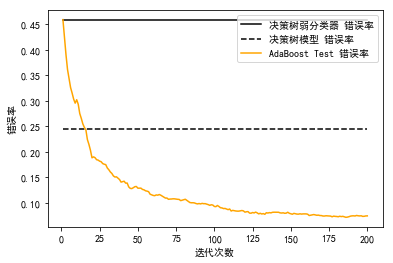

In [22]:
fig = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2,'k-',label=u'决策树弱分类器 错误率')
ax.plot([1,n_estimators],[dt_err]*2,'k--',label=u'决策树模型 错误率')
ada_err = np.zeros((n_estimators,))
for i,pred_y in enumerate(ada.staged_predict(test_x)):
    ada_err[i]=zero_one_loss(pred_y,test_y)
ax.plot(np.arange(n_estimators)+1,ada_err,label='AdaBoost Test 错误率',color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()